In [6]:
import dill as pickle
import lzma
from corner import corner

In [7]:
import elm

In [5]:
with lzma.open("./walker.xz", "rb") as f:
    walker = pickle.load(f)

Using database version X4-2024-12-31 located in: /home/kyle/db/exfor/unpack_exfor-2024/X4-2024-12-31


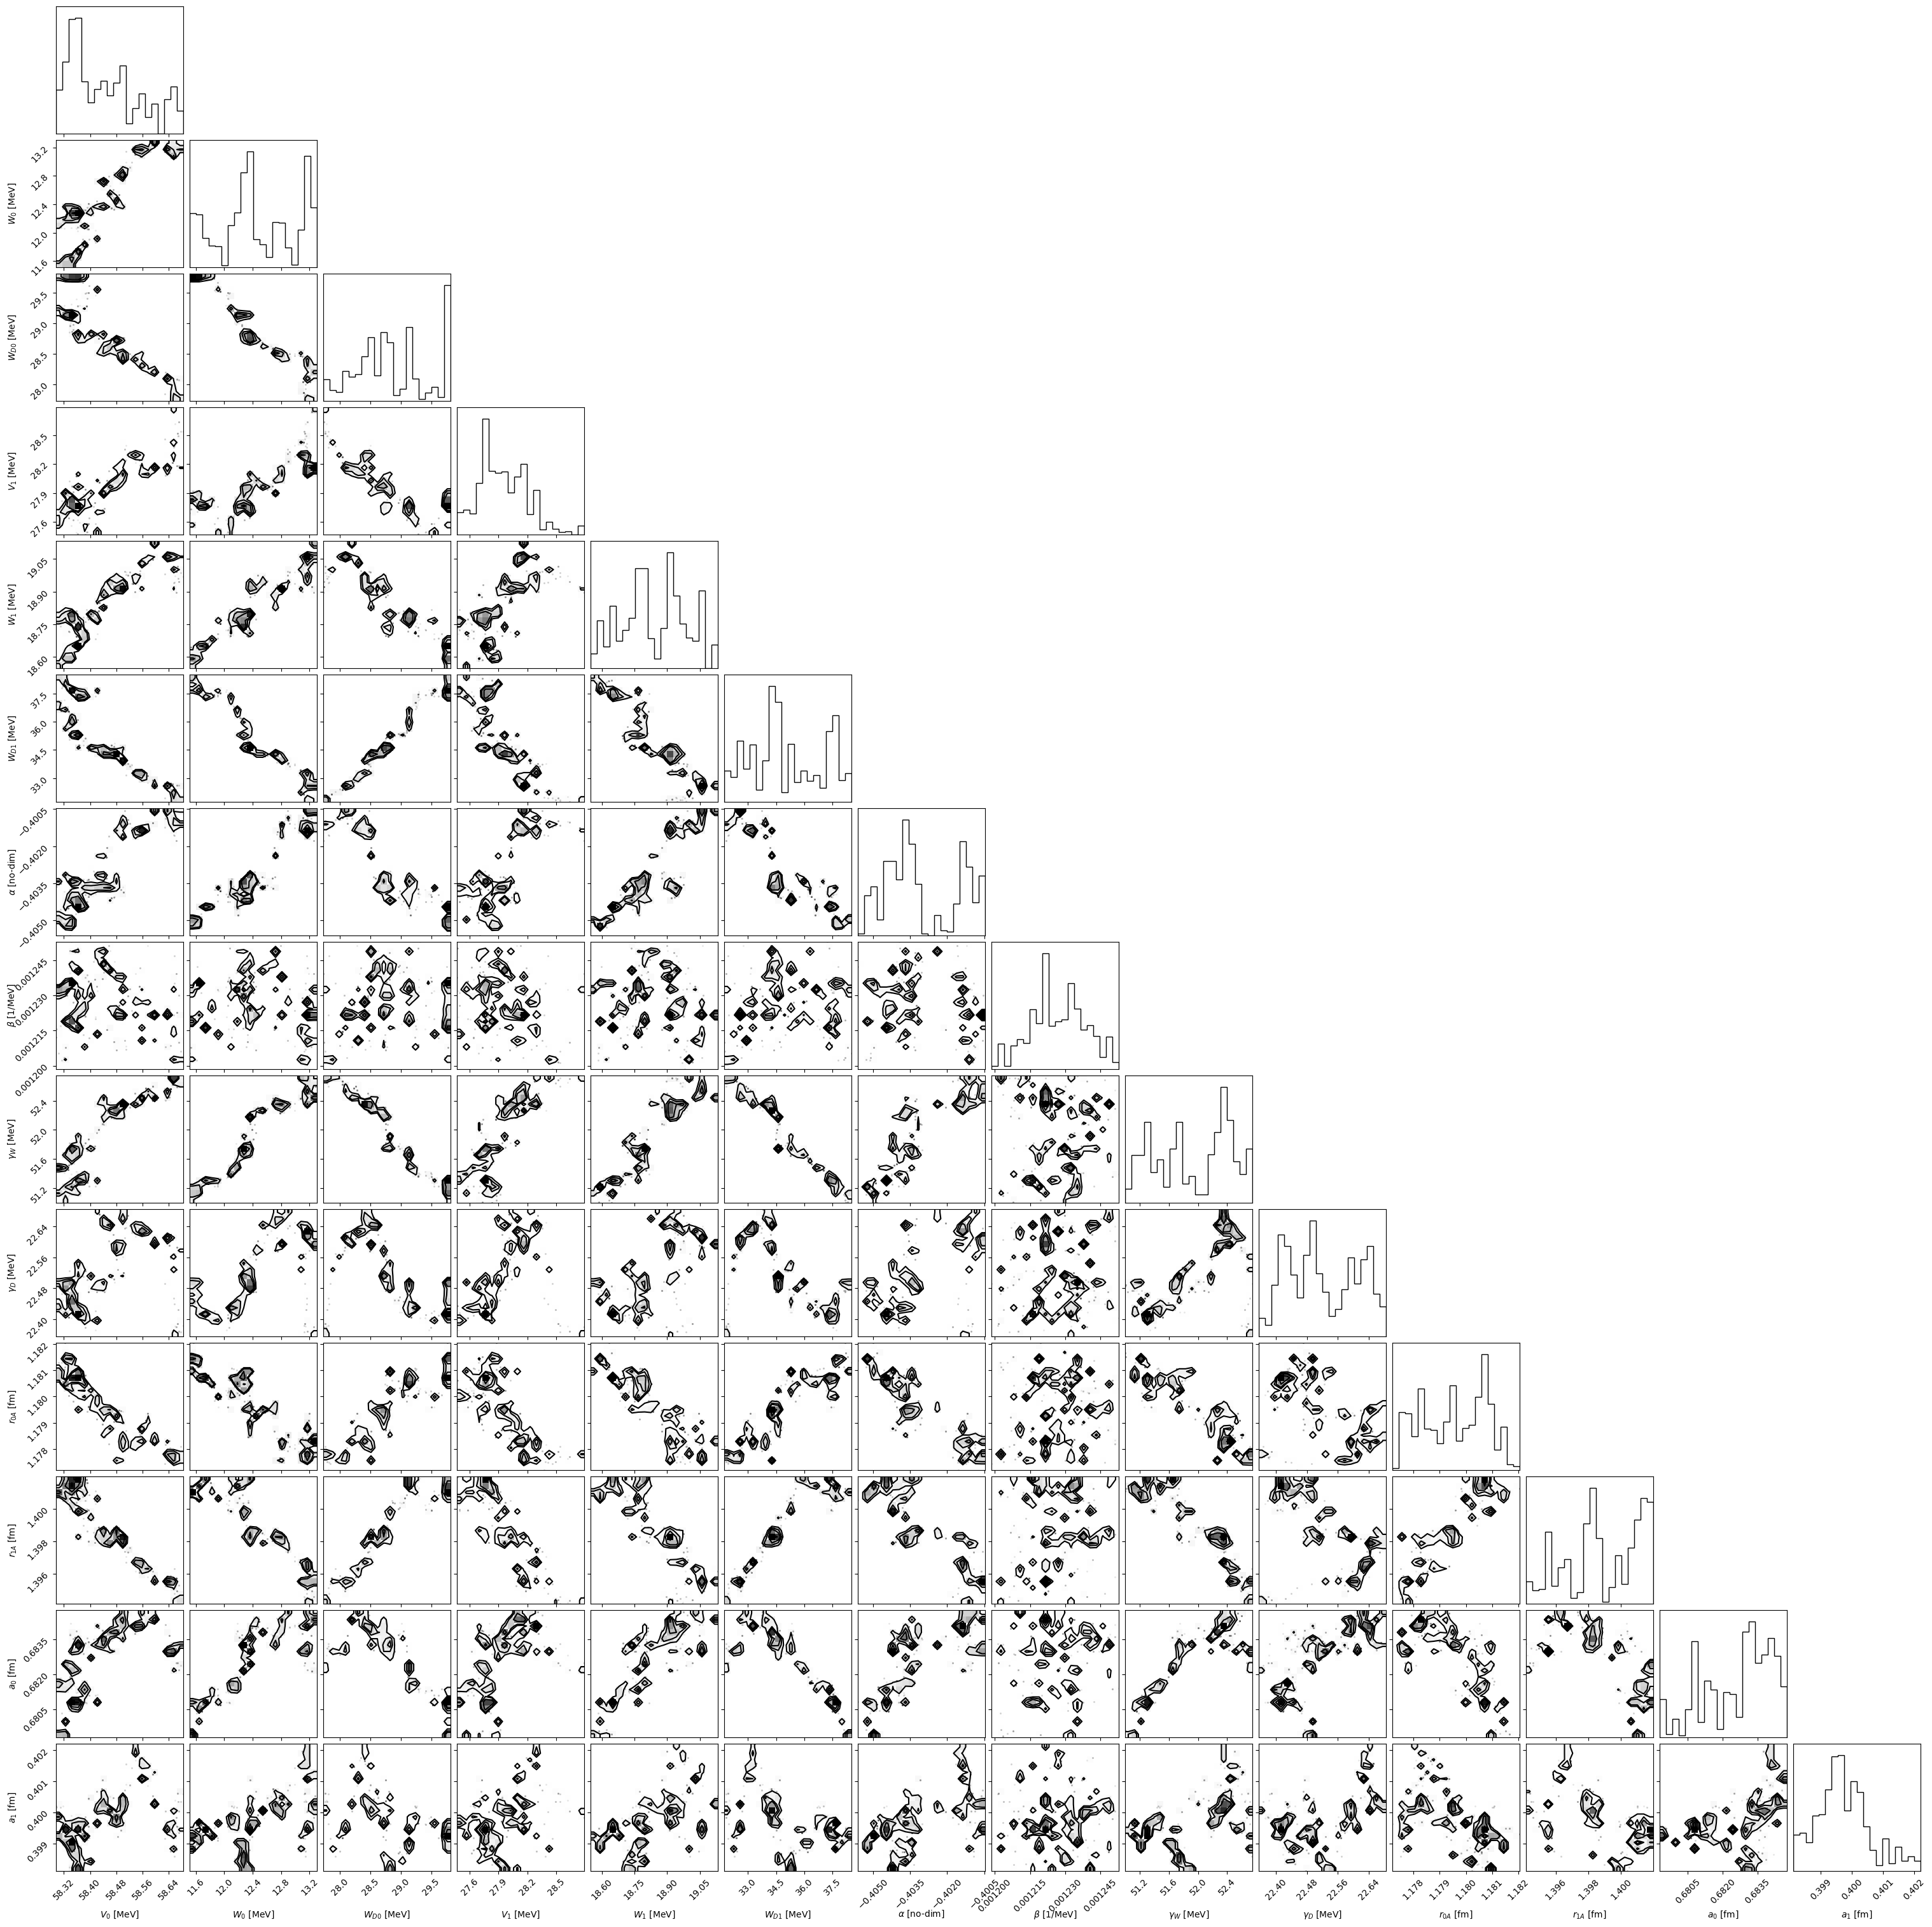

In [11]:
c = corner(
    walker.model_chain, labels=[f"${p.latex_name}$ [{p.unit}]" for p in elm.elm.params]
)